<a href="https://colab.research.google.com/github/apallath/fashion_mnist_models/blob/main/fashion_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [3]:
(x_raw, y_raw), (x_test_raw, y_test_raw) = fashion_mnist.load_data()
print(x_raw.shape, y_raw.shape)

(60000, 28, 28) (60000,)


In [10]:
x_train_raw, x_val_raw, y_train_raw, y_val_raw = train_test_split(x_raw, y_raw, test_size=0.2)
print(x_train_raw.shape, y_train_raw.shape)
print(x_val_raw.shape, y_val_raw.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


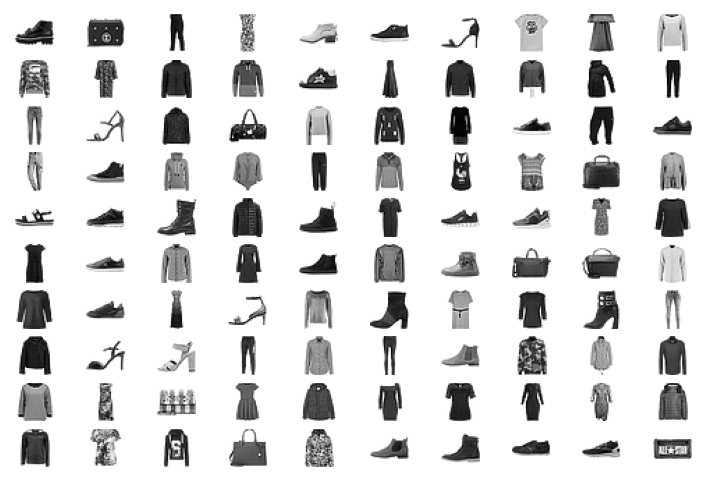

In [11]:
# Show data
plt.figure(dpi=150)
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.axis('off')
    plt.imshow(x_train_raw[i], cmap='gray_r')

In [12]:
# Reshape (add channel)
x_train = x_train_raw.reshape((48000, 28, 28, 1))
x_val = x_val_raw.reshape((12000, 28, 28, 1))
x_test = x_test_raw.reshape((10000, 28, 28, 1))

# Scale
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [13]:
# One-hot encoding
y_train = to_categorical(y_train_raw)
print(y_train.shape)

y_val = to_categorical(y_val_raw)
print(y_train.shape)

y_test = to_categorical(y_test_raw)
print(y_test.shape)

(48000, 10)
(48000, 10)
(10000, 10)


# Un-regularized CNN

In [62]:
def get_model():
    # Create CNN model
    model = models.Sequential()
    # Conv - Pool
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    # Dense
    model.add(layers.Dense(64, activation='relu'))
    # Output
    model.add(layers.Dense(10, activation='softmax'))

    return model

In [63]:
model = get_model()
model.summary()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 2, 2, 64)        

In [64]:
history = model.fit(x_train,
                    y_train,
                    batch_size=64,
                    epochs=20,
                    validation_data=(x_val, y_val))

Epoch 1/20
750/750 [==============================] - 10s 12ms/step - loss: 0.8030 - accuracy: 0.7080 - val_loss: 0.3768 - val_accuracy: 0.8651
Epoch 2/20
750/750 [==============================] - 9s 12ms/step - loss: 0.3519 - accuracy: 0.8747 - val_loss: 0.3167 - val_accuracy: 0.8835
Epoch 3/20
750/750 [==============================] - 9s 12ms/step - loss: 0.2869 - accuracy: 0.8973 - val_loss: 0.2776 - val_accuracy: 0.8960
Epoch 4/20
750/750 [==============================] - 9s 12ms/step - loss: 0.2580 - accuracy: 0.9059 - val_loss: 0.2691 - val_accuracy: 0.9027
Epoch 5/20
750/750 [==============================] - 9s 12ms/step - loss: 0.2270 - accuracy: 0.9162 - val_loss: 0.2399 - val_accuracy: 0.9134
Epoch 6/20
750/750 [==============================] - 9s 12ms/step - loss: 0.2060 - accuracy: 0.9252 - val_loss: 0.2315 - val_accuracy: 0.9129
Epoch 7/20
750/750 [==============================] - 9s 12ms/step - loss: 0.1898 - accuracy: 0.9293 - val_loss: 0.2518 - val_accuracy: 0.908

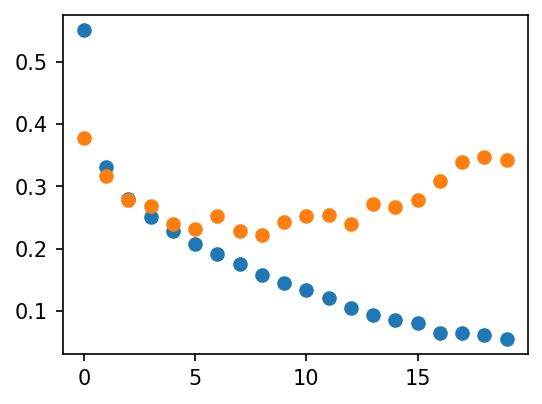

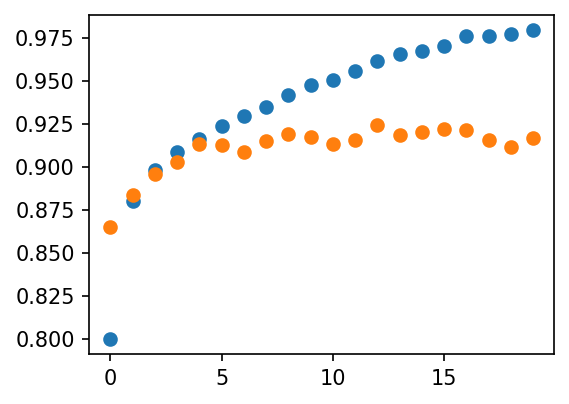

In [65]:
n_epochs = 20

fig, ax = plt.subplots(figsize=(4,3), dpi=150)
ax.plot(range(n_epochs), history.history['loss'], 'o')
ax.plot(range(n_epochs), history.history['val_loss'], 'o')

fig, ax = plt.subplots(figsize=(4,3), dpi=150)
ax.plot(range(n_epochs), history.history['accuracy'], 'o')
ax.plot(range(n_epochs), history.history['val_accuracy'], 'o')

In [66]:
# Test eval
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 5ms/step - loss: 0.3765 - accuracy: 0.9153
0.3765285611152649
0.9153000116348267


True:  Trouser
Predicted:  Trouser


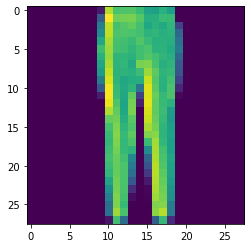

In [67]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

idx = np.random.randint(low=0, high=10000)
plt.imshow(x_test[idx].reshape((28, 28)))
print("True: ", class_names[np.argmax(y_test[idx])])
print("Predicted: ", class_names[np.argmax(model.predict(x_test[idx].reshape((1, 28, 28, 1))))])

In [68]:
model.save('/content/drive/MyDrive/colab_models/fashion_mnist_cnn_v2.h5')